Data augmentation to address overfitting in FLOWER classification CNN


We will build a cnn to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation . Data augmentation is a process of generating new training samples from current training dataset using transformation such as zoom,rotations,change in contrast etc.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 
import os
import PIL 
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# we will download flowers datset from google website and store it locally. In below call it downloads the zipfile (.tgz) in cache dir which is
# meaning the current folder

# load flower datset
dataset_url ="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

# cache_dir indicates where to download data. I specified  which means current directory
# untar true will unzip it

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib 
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/11023272144_fce94401f2_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/14600779226_7bbc288d40_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/5434913005_409c1e8b56_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/1150395827_6f94a5c6e4_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg')]

In [ ]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
# roses list(data_dir.glob('roses/*'))
# rose[:5]

In [ ]:
# PIL.Image.open(str(reses[1]))

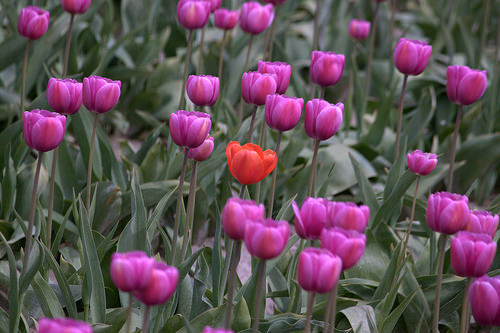

In [ ]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
# read flowers images from disk into numpy array using opencv

flowers_images_dict={
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [ ]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4

    
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2756028421_b3d5eea526_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15602874619_03fd934bed.jpg'),
 PosixPath('datasets/flower_photos/roses/19153732586_9de58c8f53_n.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'

In [ ]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(240, 159, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X,y =[],[]

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    # all the images should be in same dimensions.
    resized_img = cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
# train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=0)

In [ ]:
# preprocessing:scale images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes = 5

model =Sequential([
                   layers.Conv2D(16,3, padding='same', activation='relu'),
                   layers.MaxPooling2D(),
                   layers.Conv2D(32,3, padding='same', activation='relu'),
                   layers.MaxPooling2D(),
                   layers.Conv2D(64,3, padding='same', activation='relu'),
                   layers.MaxPooling2D(),
                   layers.Flatten(),
                   layers.Dense(128,activation='relu'),
                   layers.Dense(num_classes)

])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 79s 905ms/step - loss: 1.4502 - accuracy: 0.4077
Epoch 2/10
86/86 [==============================] - 78s 909ms/step - loss: 1.0534 - accuracy: 0.5698
Epoch 3/10
86/86 [==============================] - 76s 888ms/step - loss: 0.8624 - accuracy: 0.6642
Epoch 4/10
86/86 [==============================] - 76s 889ms/step - loss: 0.6926 - accuracy: 0.7384
Epoch 5/10
86/86 [==============================] - 77s 892ms/step - loss: 0.4795 - accuracy: 0.8201
Epoch 6/10
86/86 [==============================] - 77s 894ms/step - loss: 0.3014 - accuracy: 0.9037
Epoch 7/10
86/86 [==============================] - 77s 896ms/step - loss: 0.1519 - accuracy: 0.9549
Epoch 8/10
86/86 [==============================] - 77s 897ms/step - loss: 0.1124 - accuracy: 0.9698
Epoch 9/10
86/86 [==============================] - 80s 929ms/step - loss: 0.0562 - accuracy: 0.9880
Epoch 10/10
86/86 [==============================] - 78s 902ms/step - loss: 0.0258 - accura

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 7s 242ms/step - loss: 2.2723 - accuracy: 0.6155


[2.272291898727417, 0.6154683828353882]

In [ ]:
# we see that while train accuracy is very high (98%) the test accuracy is significally low (67%) indicating overfitting . Let's make some predictions before we use data augmentation

lens=model.predict(X_test_scaled)
lens

array([[  7.9875236 ,  31.217758  ,   1.1871288 , -12.607822  ,
         -6.7479067 ],
       [ 22.02217   ,  -7.17946   , -15.192795  ,  -2.4657362 ,
         23.514935  ],
       [ -1.2390308 ,   1.855435  ,   7.928108  ,   2.718671  ,
          2.1058187 ],
       ...,
       [  0.67787874,  15.46735   ,  -9.705999  ,   7.864494  ,
          3.001615  ],
       [ 19.493433  ,  -5.539023  ,  -5.951093  ,  -3.5975401 ,
         12.264298  ],
       [  4.4123726 ,  -8.874677  ,   8.129554  ,  15.787004  ,
          8.325923  ]], dtype=float32)

In [ ]:
score = tf.nn.softmax(lens[0])

In [ ]:
np.argmax(score)

In [ ]:
y_test[0]

In [ ]:
# improve test accuracy using data augmentation
data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180,180,3)),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)

In [ ]:
# original image

plt.axis('off')
plt.imshow(X[0])

In [ ]:
# newly generated training sample using data augmentation

plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
# train the model using data augmentation and a drop out layer

num_classes = 5

model =Sequential([
                   data_augmentation,
                   layers.Conv2D(16,3, padding='same', activation='relu'),
                   layers.MaxPooling2D(),
                   layers.Conv2D(32,3, padding='same', activation='relu'),
                   layers.MaxPooling2D(),
                   layers.Conv2D(64,3, padding='same', activation='relu'),
                   layers.MaxPooling2D(),
                   layers.Dropour(0.2),
                   layers.Flatten(),
                   layers.Dense(128,activation='relu'),
                   layers.Dense(num_classes)

])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=30)

In [ ]:
model.evaluate(X_test_scaled,y_test)

In [ ]:
# you can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 